---

<div class="alert alert-block alert-danger">
    

## Комментарий от наставника

Привет! Спасибо за проект, здорово получилось. Сейчас остались некоторые вопросы и замечания, выделены в коде красными блоками. Исправь или дополнительно прокомментируй их, пожалуйста.
</div>
    
---

# Ссылки на презентацию и Tableau

1) Презентация

https://yadi.sk/d/lmq5mG77oBmkEw

2) Для Tableau выбрал 2ой набор

https://public.tableau.com/profile/andrey7935#!/vizhome/FP2_16016349360280/Set2?publish=yes

# Анализ товарного ассортимента Интернет-магазина "Пока все ещё тут"



# Задача


Проанализировать товарный ассортимент:

1) Провести исследовательский анализ данных

2) Проанализировать товарный ассортимент

3) Сформулировать и проверить статистические гипотезы



# Описание данных из ТЗ


Датасет представляет собой историю транзакций интернет-магазина товаров для дома и быта "Пока все ещё тут".

Файл ecommerce_dataset.csv содержит колонки:

- `date` — дата заказа;

- `customer_id` — идентификатор покупателя;

- `order_id` — идентификатор заказа;

- `product` — наименование товара;

- `quantity` — количество товара в заказе;

- `price` — цена товара.



# Декомпозиция



1) Загрузка необходимых библиотек.

По факту, я сначала загружу библиотеки, которые позволят "взглянуть" на данные и понять что там есть. Когда первичный осмотр будет проведён, то дозагружу все необходимые, на мой взгляд библиотеки.

2) Загрузка и обработка данных.

Загружаю данные, делаю базовые проверки на дубликаты, пропуски и т.д. После этого, по необходимости, привожу данные и названия столбцов к удобному для работы формату.

3) Поиск и обработка выбросов.

Решим, что делать с пропусками и дубликатами. Проверим данные на аномалии, стремительный рост или падение и с чем оно могло быть связано.

4) Исследовательский анализ данных.

Проанализируем торговый ассортимент, сформулируем гипотезы и построим необходимые визуализации данных. Возможно потребуется построить прогноз, чтобы понять чего компании ждать в будущем, соответственно, потребуется написание ML.

5) Пишем общие выводы в тетради.

6) Делаем презентацию.

7) Делаем дашборд в Tableau с целью дальнейшей автоматизации мониторинга ситуации.

Я считаю, что оба представленных набора одинаково важны.

Представляю их:

Набор №1

Постройте диаграмму количества покупок по дням.
Добавьте индикатор количества покупателей.
Добавьте фильтр дашборда по дате совершения покупки.

Набор №2

Постройте диаграмму, отображающую сумму покупок по дням.
Постройте гистограмму, отображающую распределение заказов по сумме.
Добавьте фильтр дашборда по дате совершения покупки.
Поэтому, при наличии времени, постараюсь создать оба дашборда.


# Загрузка библиотек

In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
from plotly.offline import iplot
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl', offline=True)
import numpy as np
import plotly.figure_factory as ff
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from scipy.cluster.hierarchy import dendrogram, linkage
from pymystem3 import Mystem
m = Mystem()
from collections import Counter
import plotly.graph_objects as go
import numpy as np
import plotly.figure_factory as ff
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

# Первичный анализ данных и предобработка

In [2]:
df = pd.read_csv('ecommerce_dataset.csv', sep=',')
display(df.head(10))

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0
5,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Шеффлера Лузеана d-9 см,1,164.0
6,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Юкка нитчатая d-12 см h-25-35 см,1,134.0
7,2018100108,375e0724-f033-4c76-b579-84969cf38ee2,68479,Настенная сушилка для белья Gimi Brio Super 100,1,824.0
8,2018100108,6644e5b4-9934-4863-9778-aaa125207701,68478,"Таз пластмассовый 21,0 л круглый ""Водолей"" С61...",1,269.0
9,2018100109,c971fb21-d54c-4134-938f-16b62ee86d3b,68480,Чехол для гладильной доски Colombo Persia Beig...,1,674.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         6737 non-null   int64  
 1   customer_id  6737 non-null   object 
 2   order_id     6737 non-null   int64  
 3   product      6737 non-null   object 
 4   quantity     6737 non-null   int64  
 5   price        6737 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 315.9+ KB


Как и было в описании к заданию, у нас 6 столбцов с данными о времени, пользователе и товаре. 

Данные 3 типов - int64, float64 и object. Всего 6737 строк.

Приведем столбец date в формат datetime64, price в формат int64 и проверим на наличие дубликатов

In [4]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d%H')
df['price'] = df['price'].astype('int')

df.duplicated().sum()

0

Формат приведён к удобному для работы формату.

Дубликатов нет.

Изучим распределение данных в столбцах quantity и price.

count    6737.000000
mean        2.501559
std        15.266478
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max      1000.000000
Name: quantity, dtype: float64

count     6737.000000
mean       462.028499
std        871.296064
min          9.000000
25%        101.000000
50%        135.000000
75%        398.000000
max      14917.000000
Name: price, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fad2ec1c220>]],
      dtype=object)

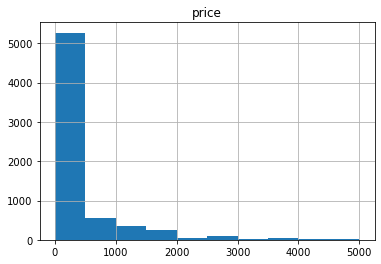

In [5]:
display(df['quantity'].describe()) 
print(' ')
display(df['price'].describe())

df.hist('price',bins=10, range = (0, 5000))

Изучим заказы с более чем 100 единицами товара.

In [6]:
display(df.query('quantity > 100'))

,date,customer_id,order_id,product,quantity,price
211,2018-10-11 14:00:00,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,"Крепеж для пружины дверной, 1107055",150,19
212,2018-10-11 14:00:00,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,Пружина дверная 240 мм оцинкованная (Д-19 мм) ...,150,38
266,2018-10-16 08:00:00,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,"Крепеж для пружины дверной, 1107055",150,19
267,2018-10-16 08:00:00,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,Пружина дверная 240 мм оцинкованная (Д-19 мм) ...,150,38
568,2018-11-01 08:00:00,aa42dc38-780f-4b50-9a65-83b6fa64e766,68815,Муляж ЯБЛОКО 9 см красное,170,51
586,2018-11-02 11:00:00,0c5aaa88-e346-4f87-8f7a-ad8cbc04e965,68831,Муляж ЯБЛОКО 9 см красное,140,59
1158,2018-12-10 14:00:00,a984c5b7-ff7e-4647-b84e-ef0b85a2762d,69289,"Ручка-скоба РС-100 белая *Трибатрон*, 1108035",200,29
2431,2019-03-23 10:00:00,685d3d84-aebb-485b-8e59-344b3df8b3d3,70841,Плечики пластмассовые Размер 52 - 54 Тула 1205158,150,20
3961,2019-05-20 21:00:00,5d189e88-d4d6-4eac-ab43-fa65a3c4d106,71478,Муляж ЯБЛОКО 9 см красное,300,51
5071,2019-06-11 07:00:00,146cd9bf-a95c-4afb-915b-5f6684b17444,71668,Вешалки мягкие для деликатных вещей 3 шт шоколад,334,148


### Комментарии

1) Заказ 71668 стоит отправить на проверку, возможно возникла ошибка при выгрузке данных. 

2) Остальные вероятнее всего оптовые клиенты, не будем исключать их из таблицы. 


Далее проверим данные на количество уникальных клиентов у одного заказа.

---

<div class="alert alert-block alert-danger">
    

## Комментарий от наставника

А что не так с заказом 71668?
</div>
    
---

<div class="alert alert-block alert-info">

Мне показалось, что многовато вешалок для одного заказа, но я подумал ещё раз. Возможно это оптовый заказ для, например, театра или ресторана.
    
На всякий случай, стоит его глянуть с IT, но в целом, дальнейших действий не требуется.
</div>
    
---

In [7]:
df.query('order_id == 71668')

,date,customer_id,order_id,product,quantity,price
5071,2019-06-11 07:00:00,146cd9bf-a95c-4afb-915b-5f6684b17444,71668,Вешалки мягкие для деликатных вещей 3 шт шоколад,334,148


In [8]:
unique_users = df.groupby('order_id').agg({'customer_id': 'nunique'})
report = unique_users.query('customer_id > 1').sort_values(by='customer_id', ascending=False)

display(report)

,customer_id
order_id,
72845,4
69485,3
71480,3
14872,2
70946,2
72790,2
72778,2
72188,2
71663,2


### Комментарии

1) Имеется 29 строк, где у одного заказа разные клиенты. 

2) Много заказов, где указан один номер заказа, но разные даты исполнения. По сути, получается, что в таких случаях клиент не сразу сделал заказ. Избавимся от лишних данных, отсорируя таблицу по последней дате из заказа.

In [9]:
df['day'] = df['date'].astype('datetime64[D]') 
last_order_date = df.groupby('order_id')['day'].max()
last_order_date.name = 'last_order_date'
df = df.join(last_order_date,on='order_id')

df = df.drop(df[df.last_order_date != df.day].index).reset_index(drop=True)
del df['day']
del df['last_order_date']

Проверим данные ещё раз на количество уникальных клиентов у одного заказа.

In [10]:
unique = df.groupby('order_id').agg({'customer_id': 'nunique'})
display(unique.query('customer_id > 1'))

,customer_id
order_id,
69283,2
70808,2
71226,2
71571,2


In [11]:
df.query('order_id == 69283 or order_id == 70808 or order_id == 71226 or order_id == 71571')

,date,customer_id,order_id,product,quantity,price
1016,2018-12-10 12:00:00,2f955596-4b13-432e-93f3-6433395aafe6,69283,Сушилка для белья на батарею НИКА СБ6-65 двухъ...,1,164
1022,2018-12-10 16:00:00,e3805ccd-2d64-4d0e-92dd-902293555c35,69283,Сушилка для белья на батарею НИКА СБ6-65 двухъ...,1,164
2085,2019-03-20 15:00:00,78e8c0e7-4888-4a75-8137-a90f02a6cb8c,70808,Тележка багажная DELTA ТБР-20 черный с серым г...,1,727
2086,2019-03-20 16:00:00,ad1630b2-fc36-4961-900a-46612ff6c655,70808,Тележка багажная DELTA ТБР-20 черный с серым г...,1,727
2602,2019-04-21 15:00:00,c912fec9-fd4f-41b7-bb04-4548740b276b,71226,Сушилка для белья напольная НИКА СБ3Б 10 м белая,1,569
2604,2019-04-21 19:00:00,fd4af93f-9fbd-449f-91f8-b42b830e265b,71226,Сушилка для белья напольная НИКА СБ3Б 10 м белая,1,569
3668,2019-06-02 10:00:00,f1222eaa-d09d-4bff-ab4e-bea6fe3f68a8,71571,"Бегония Элатиор, цвет в ассортименте",1,187
3669,2019-06-02 10:00:00,95872093-2887-4ce8-8468-19234990e7d7,71571,"Бегония Элатиор, цвет в ассортименте",1,187


Осталось 4 задвоенных заказа, удалим их.

In [12]:
df = df.drop(df.index[[1022,2086,2604,3669]]).reset_index(drop=True)

---

<div class="alert alert-block alert-danger">
    

## Комментарий от наставника

Хорошая находка. А что делать с такими заказами:
</div>
    
---

<div class="alert alert-block alert-info">

В контексте задачи, я удалил дубликаты.
    
Моё предложение - отправить баг-репорт в IT и организовать встречу, чтобы подумать, как мы можем решить эту проблему на этапе сырых данных и попробовать различные варианты.
    
Возможно, совместно с IT стоит пару раз пройтись по всем этапам и повыгружать данные в тестовом режиме.
</div>
    
---

In [13]:
df[df.order_id == 72720]

,date,customer_id,order_id,product,quantity,price
4705,2019-09-22 11:00:00,0fa91725-559a-4cc8-877c-9636d6822abf,72720,Блюдо Pasabahce серия Конья диаметр 354 мм 54372B,1,262
4706,2019-09-22 12:00:00,0fa91725-559a-4cc8-877c-9636d6822abf,72720,Блюдо Pasabahce серия Конья диаметр 354 мм 54372B,1,262
4707,2019-09-22 13:00:00,0fa91725-559a-4cc8-877c-9636d6822abf,72720,Блюдо Pasabahce серия Конья диаметр 354 мм 54372B,1,262
4710,2019-09-22 14:00:00,0fa91725-559a-4cc8-877c-9636d6822abf,72720,Блюдо Pasabahce серия Конья диаметр 354 мм 54372B,1,262
4714,2019-09-22 16:00:00,0fa91725-559a-4cc8-877c-9636d6822abf,72720,Блюдо Pasabahce серия Конья диаметр 354 мм 54372B,1,262


## Вывод

1) Данные приведены в нужный формат.

2) Удалены дубликаты.

3) Проверены аномалии и пропуски.


# Исследовательский анализ данных

1) Изучим данные по пользовательской активности.

2) Консолидируем данные по уникальным клиентам и найдём среднее.

In [14]:
df['month'] = df['date'].astype('datetime64[M]') 
df['week'] = df['date'].astype('datetime64[W]') 
df['data'] = df['date'].astype('datetime64[D]') 
df['day'] = df['date'].dt.dayofweek
df['time']  = df['date'].dt.hour

mau = df.groupby('month').agg({'customer_id': 'nunique'}).mean()
wau = df.groupby('week').agg({'customer_id': 'nunique'}).mean()
dau = df.groupby('data').agg({'customer_id': 'nunique'}).mean()

print('Среднее количество уникальных клиентов:')
print('- в месяц', int(mau))
print('- в неделю', int(wau))
print('- в день', int(dau))

Среднее количество уникальных клиентов:
- в месяц 189
- в неделю 43
- в день 6


Добавим столбец с общей стоимостью заказа.

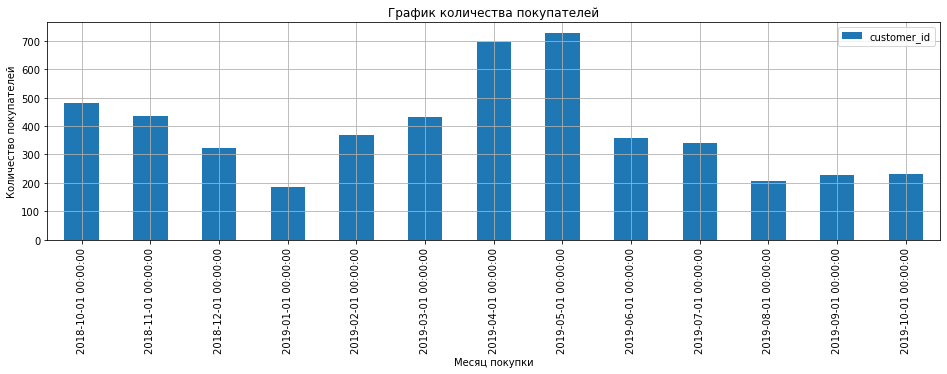

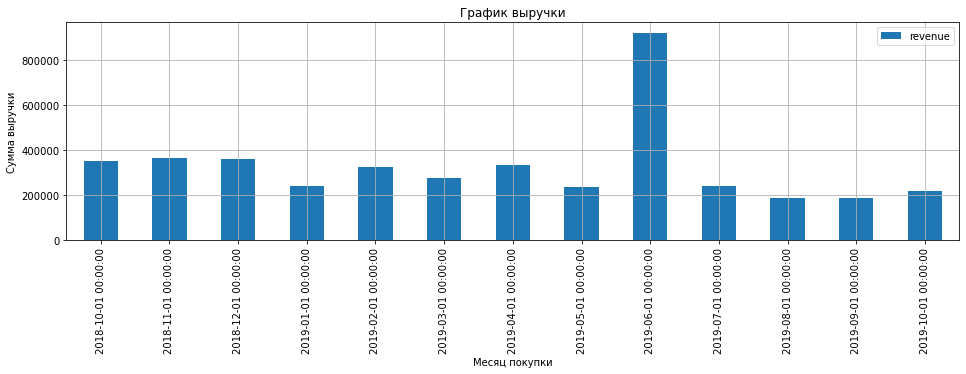

In [15]:
df['revenue'] = df['quantity'] * df['price']

clients_plot = df.pivot_table(index='month', values='customer_id', aggfunc='count').plot(grid=True, kind='bar', figsize=(16, 4))
plt.xlabel('Месяц покупки')
plt.ylabel('Количество покупателей')
plt.title('График количества покупателей')

# график суммы выручки
revenue_plot = df.pivot_table(index='month', values='revenue', aggfunc='sum').plot(grid=True, kind='bar', figsize=(16, 4))
plt.xlabel('Месяц покупки')
plt.ylabel('Сумма выручки')
plt.title('График выручки')
plt.show()

Построим 2 графика: 

1) Выручка по дням недели.

2) Выручка по часам.

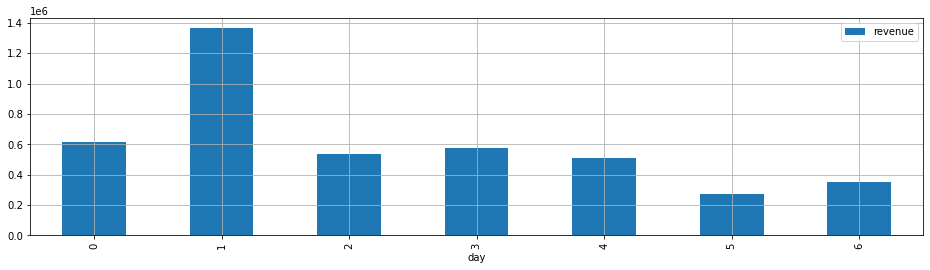

In [16]:
df.groupby('day').agg({'revenue':'sum'}).plot(grid=True, kind='bar', figsize=(16, 4))

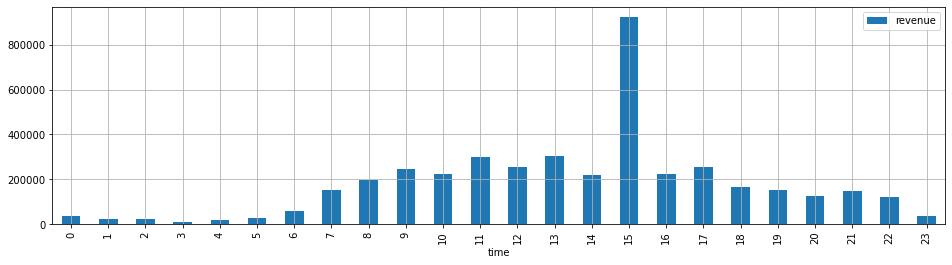

In [17]:
df.groupby('time').agg({'revenue':'sum'}).plot(grid=True, kind='bar', figsize=(16, 4))

---

<div class="alert alert-block alert-danger">
    

## Комментарий от наставника

15 часов странное время для кратного роста выручки. Похоже тут скрывается выброс.
</div>
    
---

In [18]:
df.query('time == 15').sort_values(by='quantity', ascending=False)

,date,customer_id,order_id,product,quantity,price,month,week,data,day,time,revenue
3909,2019-06-18 15:00:00,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,71743,"Вантуз с деревянной ручкой d14 см красный, Bur...",1000,675,2019-06-01,2019-06-13,2019-06-18,1,15,675000
13,2018-10-01 15:00:00,0948b0c2-990b-4a11-b835-69ac4714b21d,68486,Крючок одежный 2-х рожковый серый металлик с п...,96,38,2018-10-01,2018-09-27,2018-10-01,0,15,3648
212,2018-10-12 15:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68623,"Петля приварная гаражная d 14х90 мм с шаром, 1...",50,38,2018-10-01,2018-10-11,2018-10-12,4,15,1900
1351,2019-01-22 15:00:00,6be74251-7159-4cc0-99fb-d034a17c61b0,69928,Спатифиллум Шопен d-12 см,45,250,2019-01-01,2019-01-17,2019-01-22,1,15,11250
129,2018-10-08 15:00:00,9151d307-654c-4239-a888-ada5ca45f0b2,68571,Набор вешалок для костюма 45см 4шт цвет: кремо...,37,202,2018-10-01,2018-10-04,2018-10-08,0,15,7474
...,...,...,...,...,...,...,...,...,...,...,...,...
2263,2019-04-02 15:00:00,d3a1a9d9-4a3f-4c18-bfb2-0d23abf348bc,70978,Эвкалипт Гунни d-17 см h-60 см,1,1762,2019-04-01,2019-03-28,2019-04-02,1,15,1762
2270,2019-04-03 15:00:00,27d886b0-6f8f-47de-bf00-89fb21fb50f7,70992,Сумка-тележка хозяйственная RolserJet C. Capri...,1,3329,2019-04-01,2019-03-28,2019-04-03,2,15,3329
2313,2019-04-04 15:00:00,73495642-a43a-4cd1-b918-930683461cd1,71007,Лаванда в горшке d-15 см,1,412,2019-04-01,2019-04-04,2019-04-04,3,15,412
215,2018-10-13 15:00:00,15f8f642-59f2-4e3c-a1be-0fc9b5afb46e,68629,"Таз пластмассовый 15,0 л пищевой овальный ""Ekk...",1,209,2018-10-01,2018-10-11,2018-10-13,5,15,209


<div class="alert alert-block alert-info">

Спасибо, не заметил сразу. Это заказ 71743. Кто-то заказал 1000 вантузов. Это либо оптовый клиент, либо нам нужна ещё одна встреча с IT, чтобы решить эту проблему.
    
Пока удалим данный заказ, но баг репорт отправим.
</div>
    
---

In [19]:
df = df.drop(df.index[[3909]]).reset_index(drop=True)

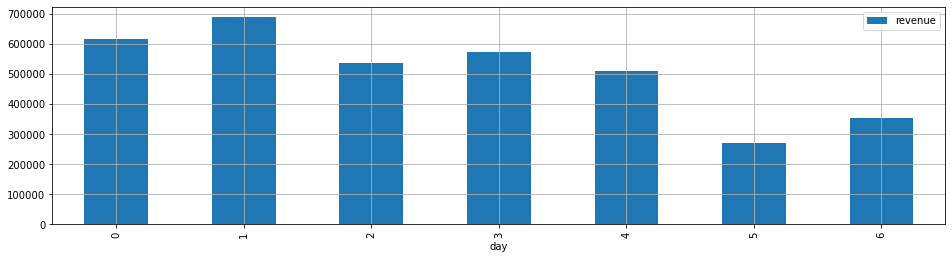

In [20]:
df.groupby('day').agg({'revenue':'sum'}).plot(grid=True, kind='bar', figsize=(16, 4))

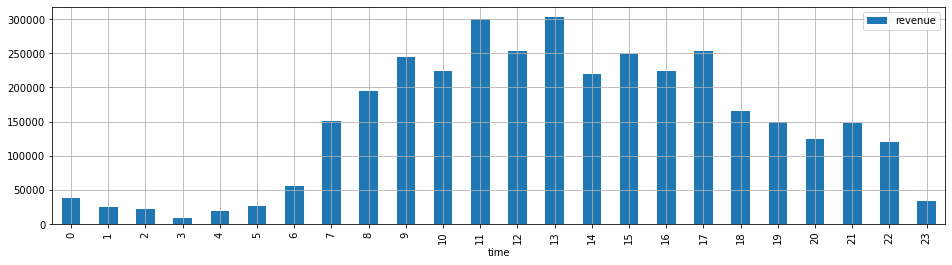

In [21]:
df.groupby('time').agg({'revenue':'sum'}).plot(grid=True, kind='bar', figsize=(16, 4))

### Комментарии

1) Данные представлены за промежуток с октября 2018 по октябрь 2019. 

2) Самые пиковые месяца по количеству покупателей апрель и май, а по выручке -  июнь. Скорее всего, присутствует определенная сезональность продаж.

3) Самый пиковый день недели - вторник. 

4) Время покупки - с 9 до 17. Пики в 11 и 13


Определим сколько времени тратится на формирование заказа.

In [22]:
first_order = df.groupby('order_id')['date'].min()
first_order.name = 'first_order'
df = df.join(first_order,on='order_id')

last_order = df.groupby('order_id')['date'].max()
last_order.name = 'last_order'
df = df.join(last_order,on='order_id')

df['order_time'] = df['last_order'] - df['first_order']
order_time = df.drop_duplicates('order_id').reset_index(drop = True)

order_time['order_time'].mean()

Timedelta('0 days 00:11:07.481135')

В среднем 11 минут. 

Интересно также взглянуть, сколько заказов приходится на одного покупателя помесячно.

In [23]:
customer = df.groupby('month').agg({'customer_id': 'nunique', 'order_id': 'nunique' })
customer.columns = ['customer_id', 'order_id']
customer['per_customer'] = ((customer['order_id'] / customer['customer_id'])).round(2)
display(customer)

,customer_id,order_id,per_customer
month,,,
2018-10-01,178,237,1.33
2018-11-01,178,204,1.15
2018-12-01,229,279,1.22
2019-01-01,150,166,1.11
2019-02-01,246,288,1.17
2019-03-01,233,248,1.06
2019-04-01,236,265,1.12
2019-05-01,166,180,1.08
2019-06-01,153,163,1.07


В среднем около 1 заказа в месяц.

Среднее количество заказов в день и средний чек.

In [24]:
order = df.groupby('day').agg({'order_id': ['count']})
order.columns = ['sum_order']

del df['week'], df['data'], df['first_order'] , df['last_order'] , df['order_time']

mean_cheсk = df.groupby('order_id').agg({'revenue':'mean'})


print('Среднее количество заказов: {:.0f} '.format(order['sum_order'].mean()))
print('Средний чек: {:.0f} рублей'.format(mean_cheсk['revenue'].mean()))

Среднее количество заказов: 717 
Средний чек: 1074 рублей


Построим график среднего чека по месяцам и дням недели:

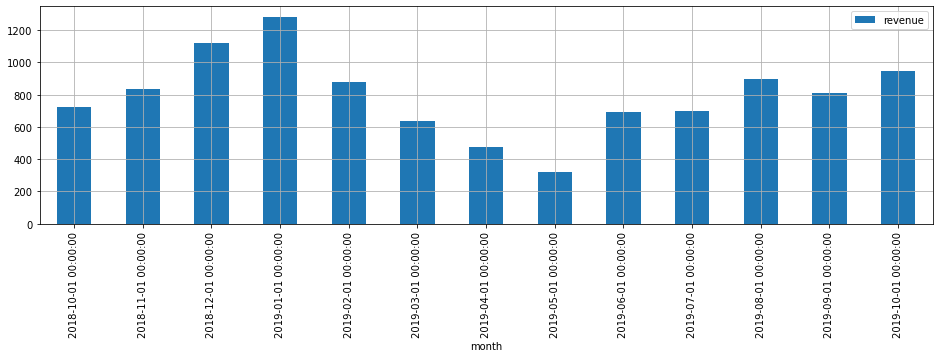

In [25]:
df.groupby('month').agg({'revenue':'mean'}).plot(grid=True, kind='bar', figsize=(16, 4))

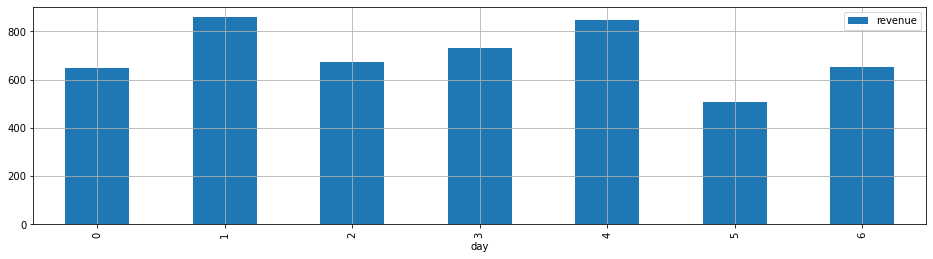

In [26]:
df.groupby('day').agg({'revenue':'mean'}).plot(grid=True, kind='bar', figsize=(16, 4))

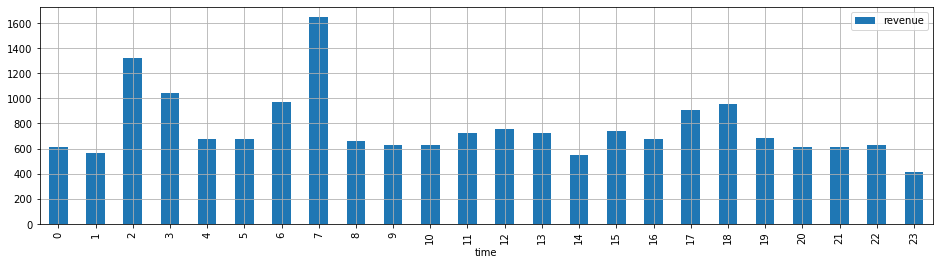

In [27]:
df.groupby('time').agg({'revenue':'mean'}).plot(grid=True, kind='bar', figsize=(16, 4))

### Комментарий

Наибольший средний чек по дням недели - понедельник, по времени - 15:00.


## Товарные категории

Применим лемматизацию для создания категорий.

In [28]:
word_list = df['product'].unique()
display(word_list)

array(['Комнатное растение в горшке Алое Вера, d12, h30',
       'Комнатное растение в горшке Кофе Арабика, d12, h25',
       'Радермахера d-12 см h-20 см', ...,
       'Сушилка для белья на ванну FREUDENBERG (GIMI) Alablock Varadero silver A4P',
       'Каланхое каландива малиновое d-7 см', 'Литопс Микс d-5 см'],
      dtype=object)

1) объединяем уникальные значения purpose  в строку и леммитизируем

2) при этом применяем counter для подсчета всех уникальных лемм

In [29]:
product_type_list = df['product'].unique()
purpose_string = ' '.join(product_type_list)
lemmas = m.lemmatize(purpose_string)

Cоздаем пустой столбец для внесения лемм товаров

In [30]:
df['lemmas_product'] = " "

df['lemmas_product'] = df['product'].apply(lambda x: ' '.join(m.lemmatize(x)).strip())
df['product_group'] = " "
df.head(5)

,date,customer_id,order_id,product,quantity,price,month,day,time,revenue,lemmas_product,product_group
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142,2018-10-01,0,0,142,комнатный растение в горшок алый вер...,
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194,2018-10-01,0,0,194,комнатный растение в горшок кофе ара...,
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112,2018-10-01,0,0,112,радермахер d - 12 см h - 20 см,
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179,2018-10-01,0,0,179,хризолидокарпус лутесценс d - 9 см,
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112,2018-10-01,0,0,112,циперус зумула d - 12 см h - 25 см,


In [31]:
categories = { 
    'Посуда и кухонные принадлежности': ['тарелка','венчик', 'косточка', 'вилка', 'сковорода',  # кстати переносы строк \ тут не нужны
                                          'скалка', 'терка', 'толкушка', 'блюдо', 'термос', 'сотейник', 
                                                    'ложка', 'кружка', 'половник', 'Luminarc', 'Luminarc', 
                                                    'нож', 'скатерть', 'котел', 'термокружок', 
                                                    'салфетница', 'столовый','сервировочный', 'заварочный',
                                                    'хлебница', 'кухня', 'кастрюля', 'посуда', 'кувшин', 
                                                    'тортница', 'контейнер', 'овощечистка', 'банка', 'миска', 'кухонный',
                                                    'свч', 'банка', 'заварочный', 'салатник', 'дуршлаг'],  # и остальные товары из категории кухонных принадлежностей
    'Растения (комнатные, рассада, прочие)': ['пеларгония', 'кассета', 'рассада', 'растение', 'd -', 'растение', 
                                              'калибрахоа', 'декабрист', 'сорт','петуния', 'ампельный', 
                                              'роза', 'гвоздик', 'дерево','кашпо', 'цикламен', 'нидерланды', 'примула',
                                              'папоротник', 'плющ', 'лиана', 'хоста', 'фуксия'],  # аналогично продукты из этой категории
    'Сушилки для белья': ['сушилка'],    
    'Хранение вещей': ['одежда', 'костюм', 'плечики', 'вешалка', 'стеллаж', 'кофр','обувница', 'корзина', 
                       'корзинка', 'этажерка', 'хранение', 'бак'],
    'Постельные принадлежности, текстиль, одеяла, наматрацники': ['простыня', 'одеяло', 'наматрацник','пододеяльник', 
                                                                  'наволочка', 'полотенце', 'покрывало', 'наматрасник', 
                                                                  'плед', 'наматрицник', 'белье'],
    'Декор, интерьер, мебель': ['искусственный', 'искуственный', 'цветок', 'пуф','комод', 'интерьерный', 'муляж', 
                                'декоративный', 'светильник'],
    'Сумки-тележки': ['колесо', 'сумка', 'тележка'],


    'Все для ремонта': ['стремянка', 'скоба', 'пружина', 'крепеж', 'уголок', 'завертка', 'шпингалет', 'крючок', 
                        'петля', 'стяжка', 'инструмент', 'полка', 'полк', 'фал', 'напильник', 'насадка валик'],

    'Гладильные доски': ['доска', 'подкладка', 'чехол', 'гладильный', 'подрукавник'],
    'Ерши для унитаза и вантузы': ['ерш', 'вантуз'],
    'Тазы, корыта, ведра, ковши': ['таз', 'ведро', 'корыто', 'ковш'],
    'Товары для ванной': ['ванный', 'халат', 'ванна', 'зубной', 'карниз', 'противоскользящий', 'мыло'],
    'Все для уборки': ['веник', 'совок', 'швабра', 'мусорный', 'мусор', 'салфетка', 'щетка', 'перчатка', 'сметка', 'мусор', 
                       'окномойка', 'тряпка', 'микрофибры'],
    'Урны, термометры, коврики придверные': ['урна', 'придверный', 'термометр', 'коврик', 'влаговпитывающий'],
    'Мелкая бытовая техника': ['чайник', 'электроштопор', 'пылесос', 'мантоварка', 'миксер', 'овощеварка', 'весы', 
                               'пароварка','соковарка', 'утюг', 'фен']   
}

In [32]:
def classify(lemmas_product):
    # проходим по словарю categories
    
    for category, product_list in categories.items():
        # перебираем название товара с списке каждой категории       
        for product in product_list:
            if product in lemmas_product:
                return category
             
    return 'Прочее'

In [33]:
df['product_group'] = df.lemmas_product.apply(classify)
display(df.head(10))

,date,customer_id,order_id,product,quantity,price,month,day,time,revenue,lemmas_product,product_group
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142,2018-10-01,0,0,142,комнатный растение в горшок алый вер...,"Растения (комнатные, рассада, прочие)"
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194,2018-10-01,0,0,194,комнатный растение в горшок кофе ара...,"Растения (комнатные, рассада, прочие)"
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112,2018-10-01,0,0,112,радермахер d - 12 см h - 20 см,"Растения (комнатные, рассада, прочие)"
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179,2018-10-01,0,0,179,хризолидокарпус лутесценс d - 9 см,"Растения (комнатные, рассада, прочие)"
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112,2018-10-01,0,0,112,циперус зумула d - 12 см h - 25 см,"Растения (комнатные, рассада, прочие)"
5,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Шеффлера Лузеана d-9 см,1,164,2018-10-01,0,0,164,шеффлер лузеан d - 9 см,"Растения (комнатные, рассада, прочие)"
6,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Юкка нитчатая d-12 см h-25-35 см,1,134,2018-10-01,0,0,134,юкка нитчатый d - 12 см h - 25 - 35 см,"Растения (комнатные, рассада, прочие)"
7,2018-10-01 08:00:00,375e0724-f033-4c76-b579-84969cf38ee2,68479,Настенная сушилка для белья Gimi Brio Super 100,1,824,2018-10-01,0,8,824,настенный сушилка для белье Gimi Bri...,Сушилки для белья
8,2018-10-01 08:00:00,6644e5b4-9934-4863-9778-aaa125207701,68478,"Таз пластмассовый 21,0 л круглый ""Водолей"" С61...",1,269,2018-10-01,0,8,269,"таз пластмассовый 21 , 0 л круглый "" ...","Тазы, корыта, ведра, ковши"
9,2018-10-01 09:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68480,Чехол для гладильной доски Colombo Persia Beig...,1,674,2018-10-01,0,9,674,чехол для гладильный доска Colombo P...,Гладильные доски


---

<div class="alert alert-block alert-danger">
    

## Комментарий от наставника

Добавь, пожалуйста, комментарий откуда взялся этот словарь. Если у коллег будут вопросы по каким-либо категориям, то нужно хотя бы направление для понимания логики этого словаря.
</div>
    
---

<div class="alert alert-block alert-info">

1) При помощи лемматизации мы выделили наиболее часто встречающиеся слова
    
2) Посчитали количество их повторений
    
3) На этой основе, составили словарь и с его помощью в дальнейшем разбили товары на категории.
</div>
    
---

In [34]:
df.groupby('product_group').agg({'customer_id':'nunique',
                                  'quantity':'sum', 
                                  'order_id':'count',
                                  'product':'nunique',
                                  'price':'mean',
                                  'revenue':'sum'}).round(2)

,customer_id,quantity,order_id,product,price,revenue
product_group,,,,,,
Все для ремонта,91,1234,113,75,1719.69,238874
Все для уборки,64,521,81,55,610.41,116968
Гладильные доски,188,277,232,119,1157.38,294113
"Декор, интерьер, мебель",124,1729,195,99,127.66,102506
Ерши для унитаза и вантузы,19,155,21,12,331.71,14803
Мелкая бытовая техника,27,33,32,28,1033.84,34095
"Постельные принадлежности, текстиль, одеяла, наматрацники",34,113,39,36,1153.18,127789
Посуда и кухонные принадлежности,309,1786,583,347,341.70,395355
Прочее,130,446,260,190,108.81,38713


---

<div class="alert alert-block alert-danger">
    

## Комментарий от наставника

Почти половина данных попадает в категорию "прочее", заказчика это не устроит. Можно снизить эту долю хотя бы до трети?
</div>
    
---

<div class="alert alert-block alert-info">

Полностью переписал категории. Теперь их стало больше. Категория Прочее снижена.
</div>
    
---

Категории сильно разнятся между собой.

Взглянем на графики по категориям.

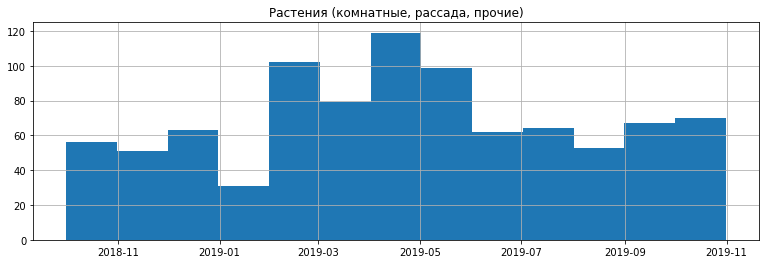

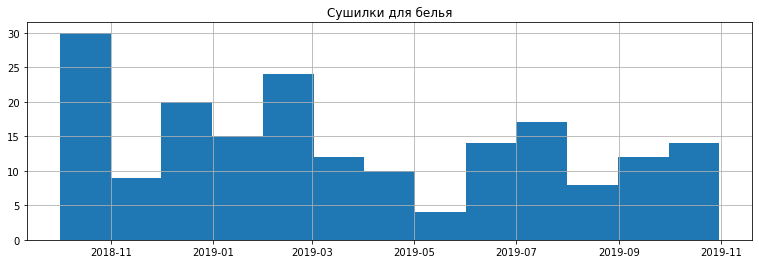

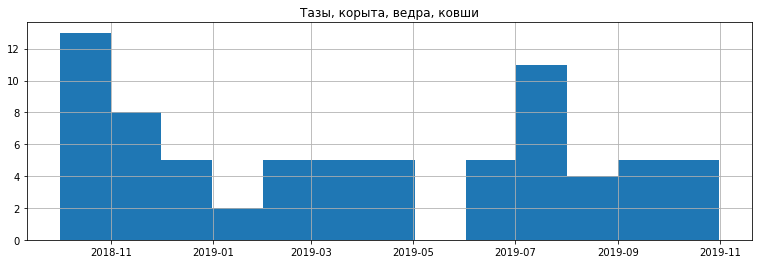

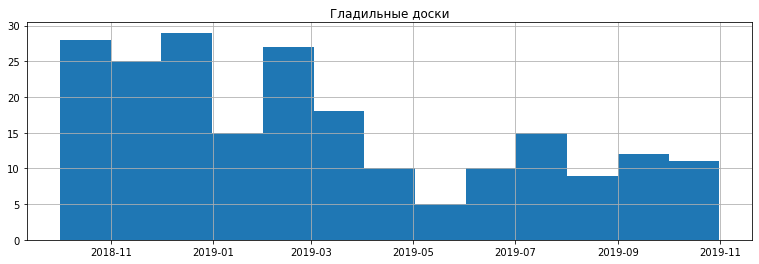

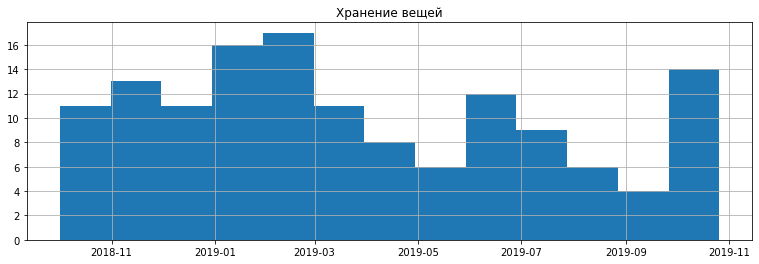

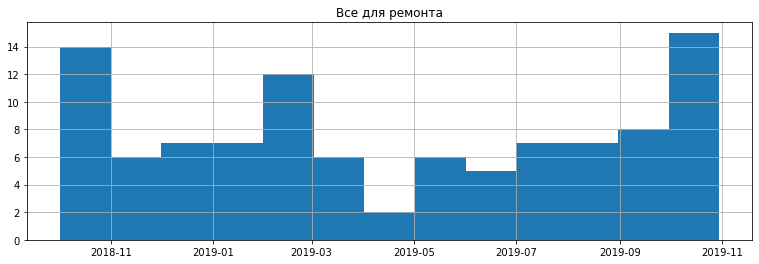

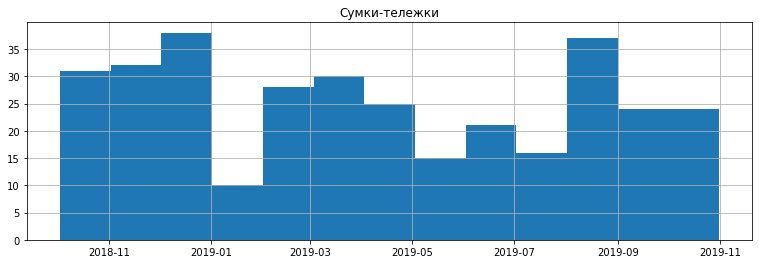

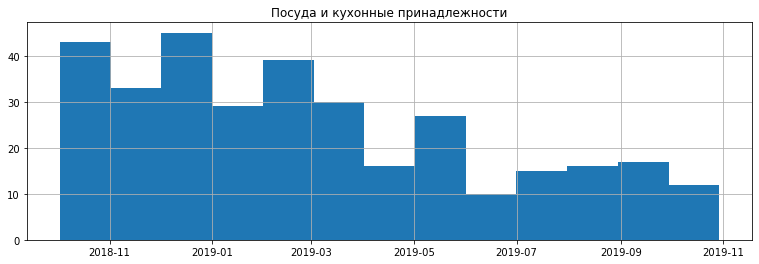

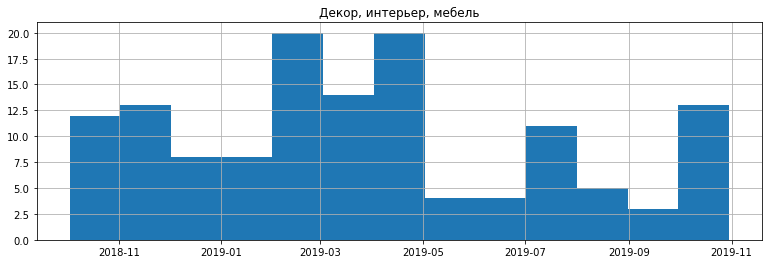

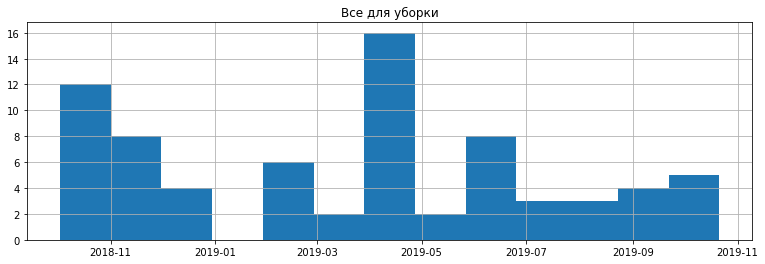

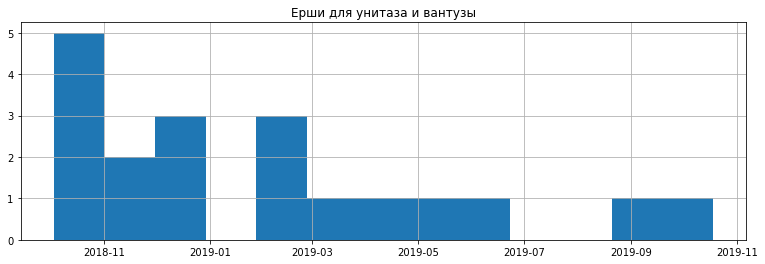

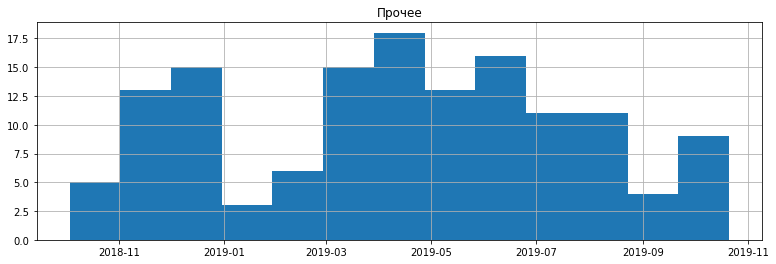

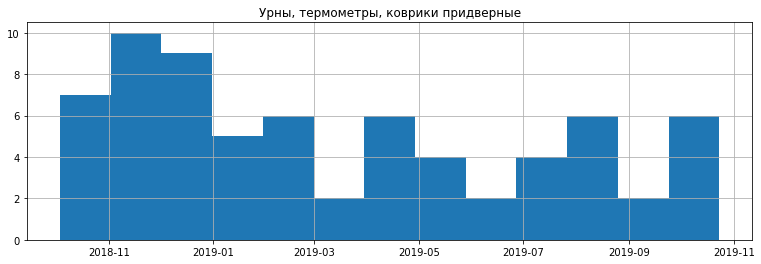

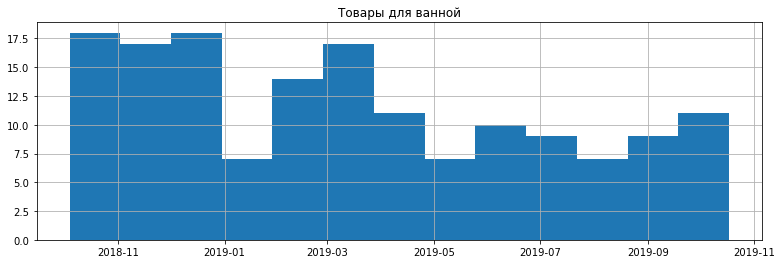

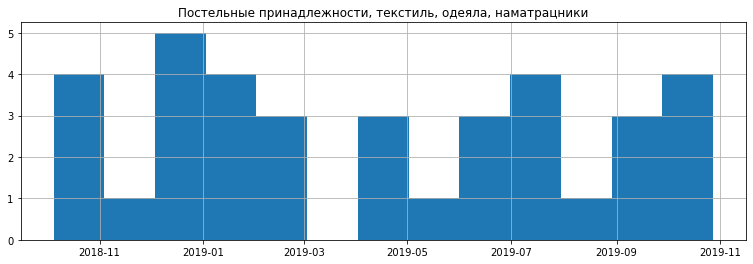

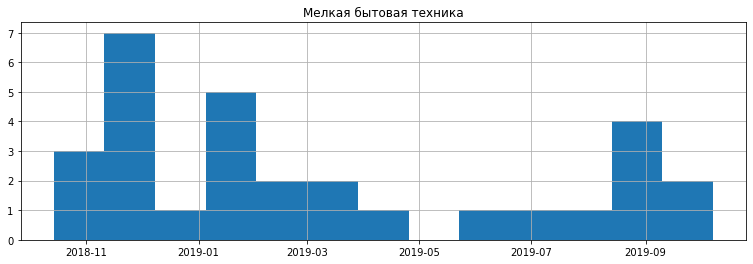

In [35]:
for product_group in  df['product_group'].unique():
    plt.figure(figsize=(13, 4))
    df[df['product_group']==product_group].groupby('order_id').agg({'date':'min'})['date'].hist(bins=13)
    plt.title(product_group)
    plt.show()

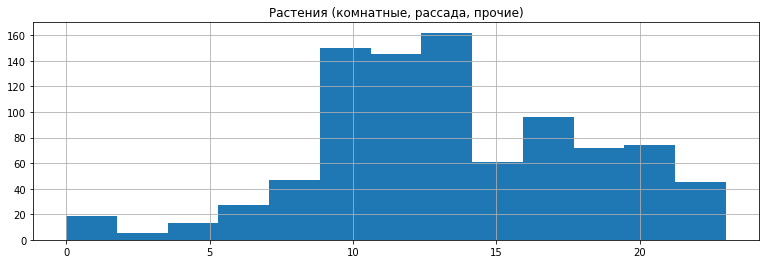

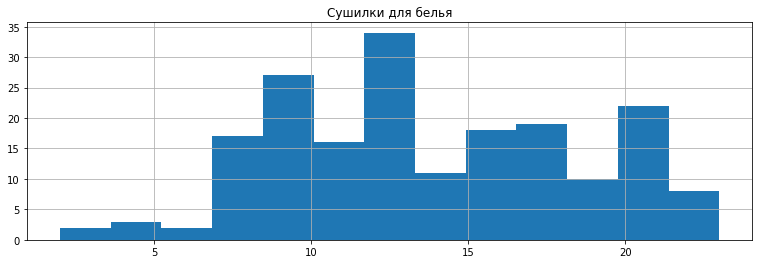

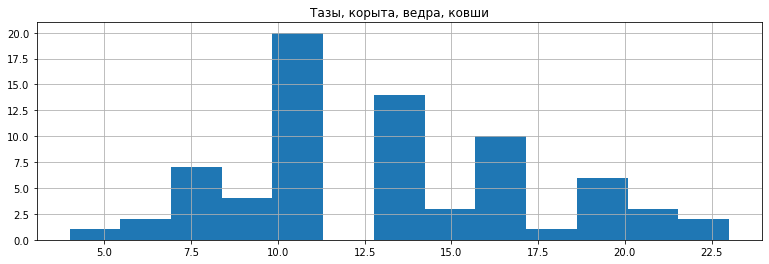

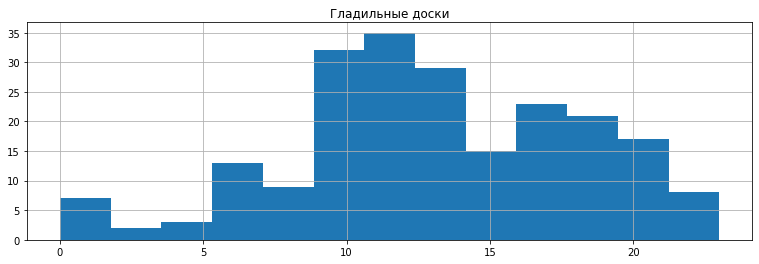

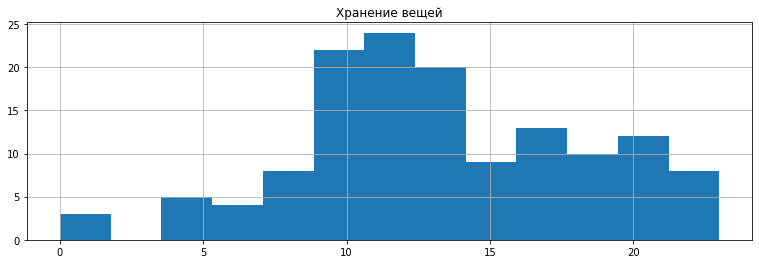

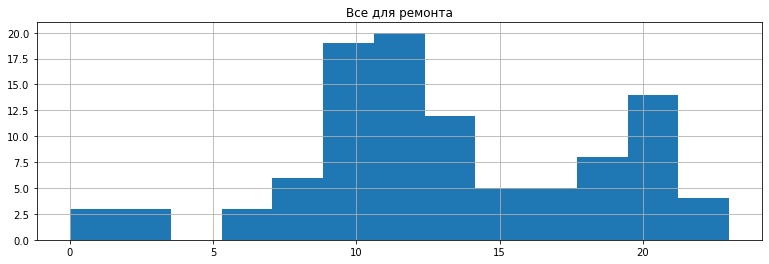

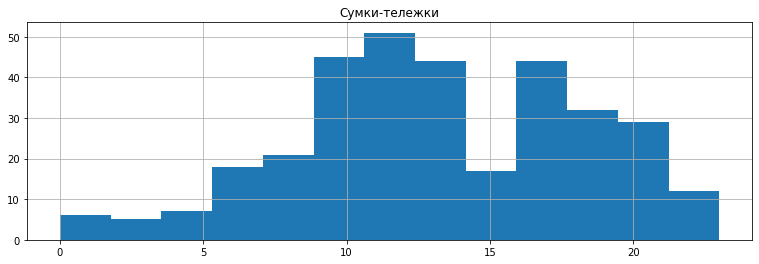

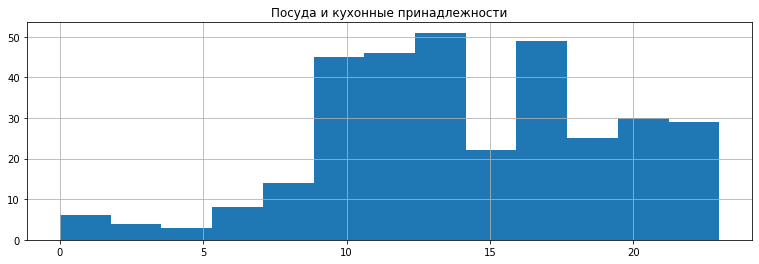

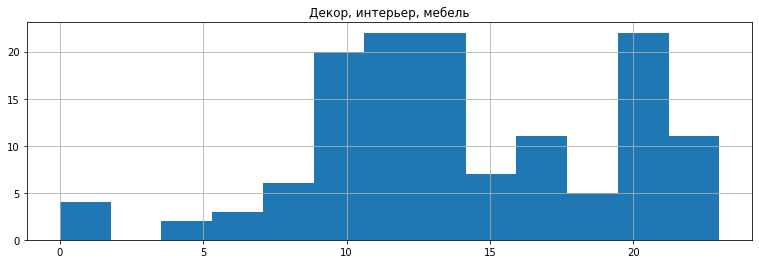

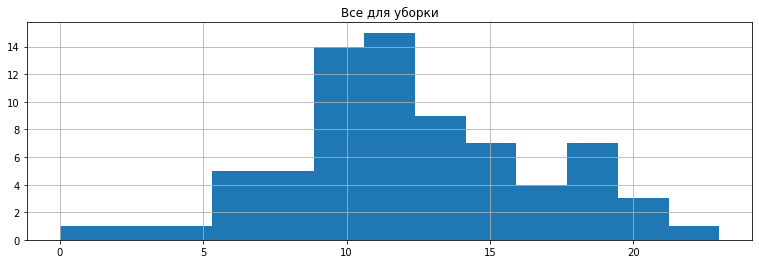

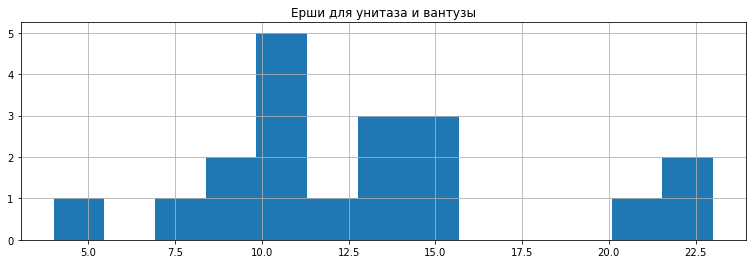

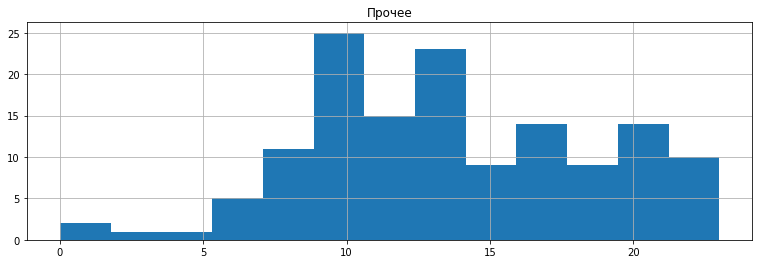

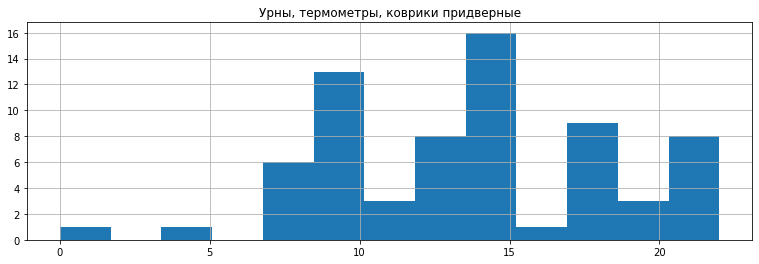

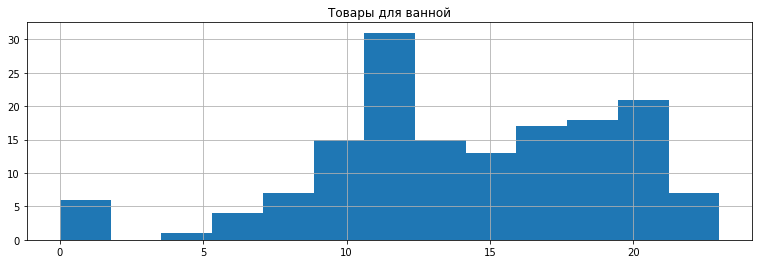

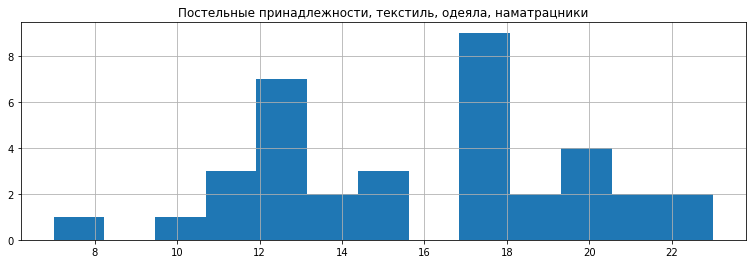

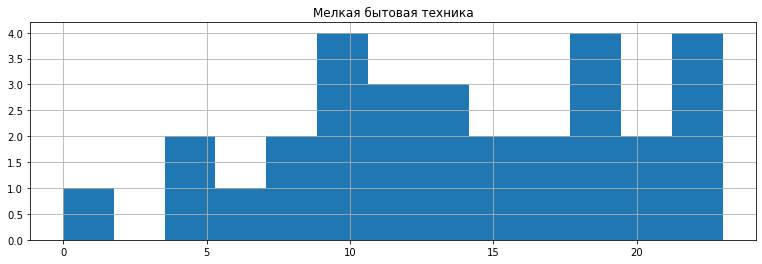

In [36]:
for product_group in  df['product_group'].unique():
    plt.figure(figsize=(13, 4))
    df[df['product_group']==product_group].groupby('order_id').agg({'time':'min'})['time'].hist(bins=13)
    plt.title(product_group)
    plt.show()

Основные часы покупки с 7 до 21.

Посмотрим на ТОП продаж.

In [37]:
temp = df.groupby('product_group', as_index=False).agg({'quantity':'count'})

product_group = temp['product_group']
values = temp['quantity']

fig = go.Figure(data=[go.Pie(labels=product_group, values=values)])
fig.update_layout(
    title={
        'text': "Категории по количеству упоминаний в заказах",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [38]:
temp = df.groupby('product_group', as_index=False).agg({'revenue':'sum'})

category = temp['product_group']
values = temp['revenue']

fig = go.Figure(data=[go.Pie(labels=product_group, values=values)])
fig.update_layout(
    title={
        'text': "Общая выручка по категориям",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [39]:
temp = df.groupby('product_group', as_index=False).agg({'revenue':'mean'})

category = temp['product_group']
values = temp['revenue']

fig = go.Figure(data=[go.Pie(labels=product_group, values=values)])
fig.update_layout(
    title={
        'text': "Средний чек по категориям",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

Самыми прибыльными оказались категории - прочее и хозтовары.

Определим, влияет ли сезонность на количество заказов товаров определенной категории.

In [40]:
order = df.groupby(['month', 'product_group']).agg({'order_id': 'count'}).sort_values(by = 'order_id', ascending = False).reset_index()

fig = px.bar(order, x='month', y='order_id', title='График количества заказов по категориям', color='product_group', width=1000, height=500)
fig.show()

In [41]:
revenue = df.groupby(['month', 'product_group']).agg({'revenue':'mean'}).sort_values(by = 'revenue', ascending = False).reset_index()

fig = px.bar(revenue, x='month', y='revenue', title='График выручки по категориям', color='product_group', width=1000, height=500)
fig.show()

Товары имеют ярко выраженную сезональность. Ясно, что к лету люди покупают больше растений и рассады.

## Выводы

- 13 заказов в день;

- средний чек 1317 руб;

- поделили товары на 4 основные категории, лидером по количеству заказов является категория - растения;

- спрос на растения и рассаду повышается с марта по май;

- по выручке и среднему чеку за все время на первом месте категория "прочее", далее идут "хозтовары", "растения" и "рассада";

- по категории "прочее" в июне самая большая выручка и средний чек.


## Кластеризация

Для дальнейшей работы нам потребуется занятся кластеризацией.

Соответственно, применим Machine Learning.

Для кластеризации рассмотрим следующие признаки:

- Средняя цена на товар

- Среднее кол-во товара

- Среднее количество товара в одном заказе

- Время года

- День недели

In [42]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

ml_data = df.groupby('product', as_index=False).agg({'price':'mean', 'quantity':'sum'})
ml_data.columns = ['product', 'price', 'quantity']

temp = df.groupby(['order_id', 'product'], as_index=False).agg({'quantity':'mean'})
temp = temp.groupby('product', as_index=False).agg({'quantity':'mean'}).round(2)
ml_data = pd.merge(ml_data, temp, on='product')
ml_data.columns = ['product', 'price', 'quantity', 'mean_quantity_in_order']
display(ml_data.head())

,product,price,quantity,mean_quantity_in_order
0,Tepмокружка AVEX Freeflow 700 мл зеленый AVEX0759,2399.0,1,1.0
1,Tepмокружка AVEX Freeflow 700 мл сталь AVEX0776,2399.0,1,1.0
2,Tepмокружка AVEX Recharge 500 мл голубой AVEX0681,2099.0,2,1.0
3,Ёрш бутылочный с металлической ручкой малый Y6...,22.0,10,10.0
4,Ёрш для бутылки из натурального волокна и мета...,142.0,10,10.0


In [43]:
temp = df[(df['year']!=2019)|(df['month']!=10)] 

Убрали последний месяц из данных, чтобы он не портил общую картину.

In [44]:
temp = pd.pivot_table(temp, columns='day', values='quantity', index='product', aggfunc='sum').reset_index()
temp.columns = ['product', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']
temp['sum'] = temp.iloc[:,1:9].sum(axis=1)
temp['monday'] = temp['monday']/temp['sum']
temp['tuesday'] = temp['tuesday']/temp['sum']
temp['wednesday'] = temp['wednesday']/temp['sum']
temp['thursday'] = temp['thursday']/temp['sum']
temp['friday'] = temp['friday']/temp['sum']
temp['saturday'] = temp['saturday']/temp['sum']
temp['sunday'] = temp['sunday']/temp['sum']
del temp['sum']
temp = temp.fillna(0)
ml_data = pd.merge(ml_data, temp, on='product', how='left')

In [45]:
temp = df[(df['year']!=2019)|(df['month']!=10)] 
temp['season'] = temp['month'].map({12:'winter', 1:'winter',2:'winter',
                   3:'spring',4:'spring',5:'spring',
                   6:'summer',7:'summer',8:'summer',
                   9:'autumn',10:'autumn', 11:'autumn'})
temp['season'].value_counts()

spring    1859
autumn    1146
summer     904
winter     876
Name: season, dtype: int64

In [46]:
temp = pd.pivot_table(temp, columns='season', values='quantity', index='product', aggfunc='sum').reset_index()
temp['sum'] = temp.iloc[:,1:6].sum(axis=1)
temp['autumn'] = temp['autumn']/temp['sum']
temp['spring'] = temp['spring']/temp['sum']
temp['summer'] = temp['summer']/temp['sum']
temp['winter'] = temp['winter']/temp['sum']
del temp['sum']
temp = temp.fillna(0)
ml_data = pd.merge(ml_data, temp, on='product', how='left')

Стандартизируем данные и построим матрицу расстояний на стандартизованной матрице признаков:

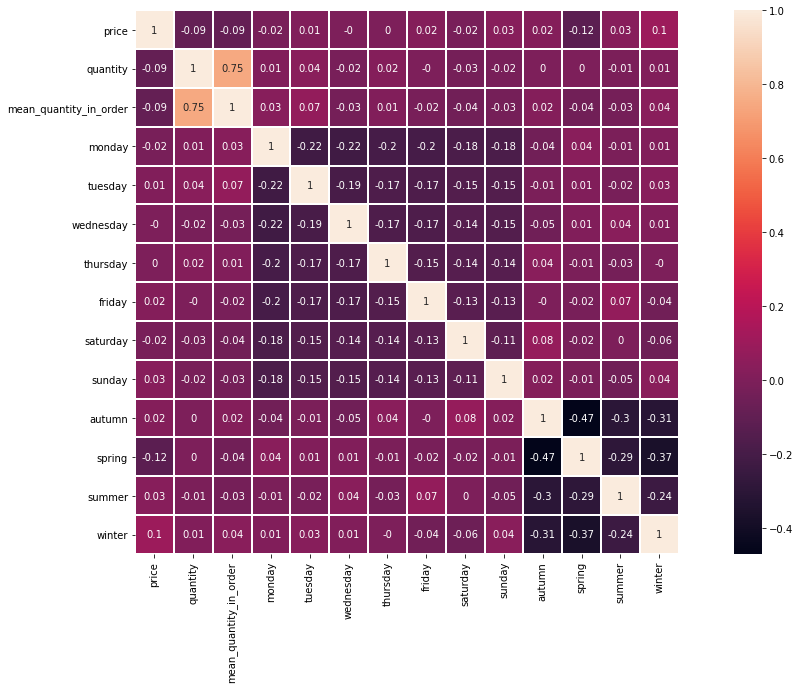

In [47]:
X = ml_data.drop('product', axis=1)
X = X.dropna()

scaler = StandardScaler()
x_sc = scaler.fit_transform(X)

plt.figure(figsize=(20, 10))
sns.heatmap(X.corr().round(2), annot = True, square=True, linewidths=1) 
plt.show()

Только quantity и mean_quantity_in_order хорошо коррелирует между собой, остальные обладают слабой корреляцией.

In [48]:
linked = linkage(x_sc, method = 'ward')
linked.shape

(2242, 4)

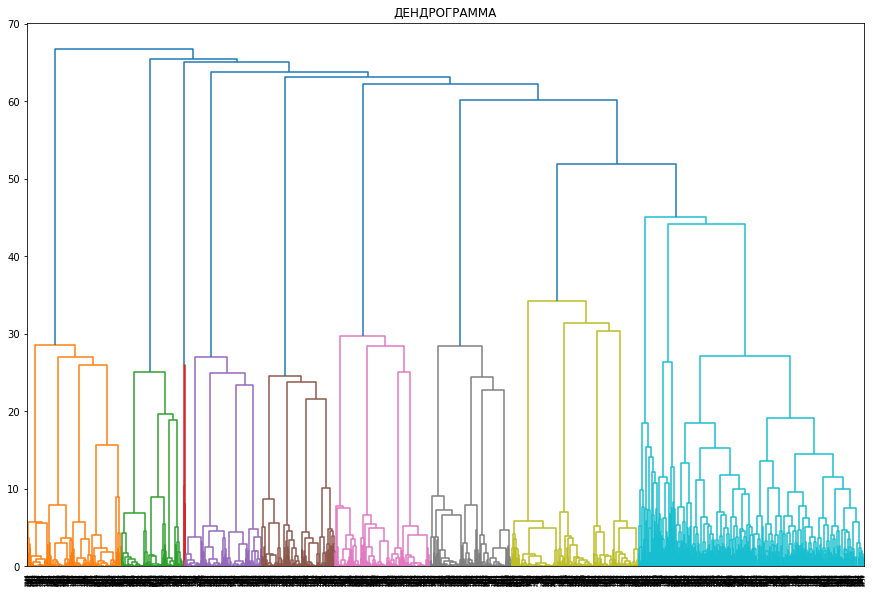

In [49]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('ДЕНДРОГРАММА')
plt.show()

Получили 7 групп. 

Зададим модель k_means и спрогнозируем кластеры.

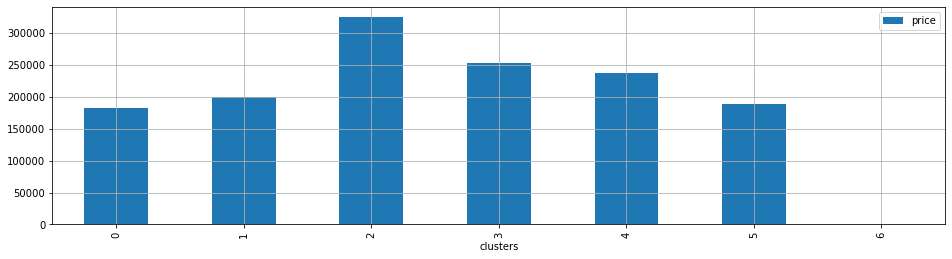

In [50]:
ml_data = ml_data.dropna()

km = KMeans(n_clusters = 7, random_state=0)

labels = km.fit_predict(x_sc)

ml_data['clusters'] = labels

ml_data.groupby('clusters').agg({'price':'sum'}).plot(grid=True, kind='bar', figsize=(16, 4))

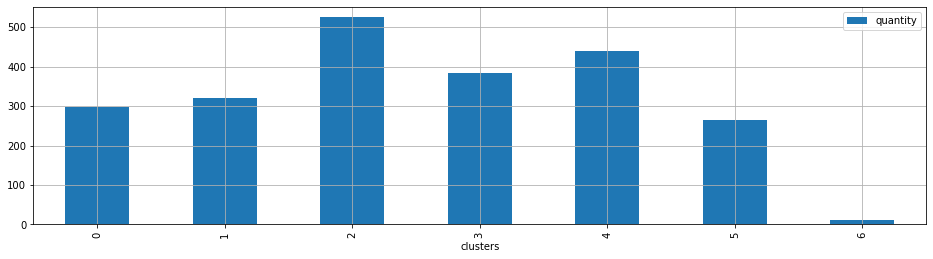

In [51]:
ml_data.groupby('clusters').agg({'quantity':'count'}).plot(grid=True, kind='bar', figsize=(16, 4))

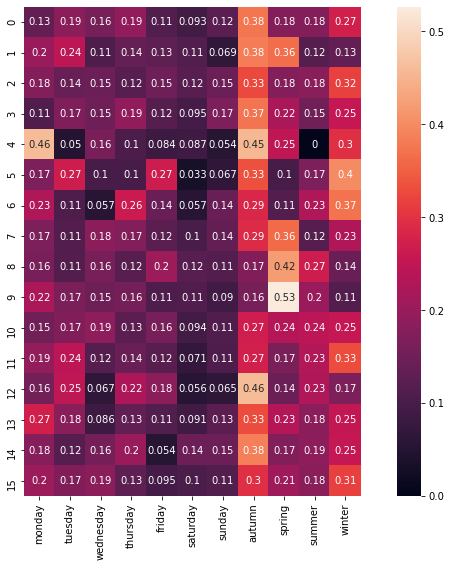

In [52]:
temp = pd.merge(ml_data, df[['product', 'product_group']], on='product', how='left')
temp = temp.drop('product', axis=1).groupby('product_group').mean().reset_index()

tempic = temp.drop(['clusters', 'price', 'quantity', 'mean_quantity_in_order', 'product_group'], axis=1)

plt.figure(figsize=(13, 9))
sns.heatmap(tempic, annot = True, square=True) 
plt.show()

In [53]:
temp = ml_data.drop(['product'], axis=1).groupby('clusters').mean().reset_index()
display(temp)

,clusters,price,quantity,mean_quantity_in_order,monday,tuesday,wednesday,thursday,friday,saturday,sunday,autumn,spring,summer,winter
0,0,614.101517,5.036913,2.899463,0.031540,0.021361,0.037337,0.866514,0.021327,0.015639,0.006283,0.325170,0.315330,0.137059,0.222441
1,1,624.890279,4.109375,2.379313,0.026869,0.014213,0.903252,0.017360,0.008946,0.021399,0.007961,0.231448,0.325712,0.218296,0.224544
2,2,618.512969,4.832381,1.757676,0.039596,0.034859,0.040520,0.037961,0.041682,0.393642,0.411742,0.348084,0.300800,0.157959,0.193157
3,3,660.439737,5.164062,2.601328,0.049368,0.820863,0.032229,0.039327,0.018665,0.023348,0.016199,0.250015,0.374417,0.158232,0.217336
4,4,539.448604,4.788636,2.479205,0.896537,0.014978,0.021685,0.025663,0.017036,0.011190,0.012911,0.246574,0.377227,0.168358,0.207842
5,5,709.448272,4.097744,2.499248,0.016301,0.018692,0.024068,0.022103,0.904379,0.008931,0.005526,0.266575,0.304280,0.270428,0.158717
6,6,46.333333,200.900000,116.150000,0.355030,0.388587,0.000000,0.139705,0.022764,0.093913,0.000000,0.445705,0.142530,0.100000,0.311765


---

<div class="alert alert-block alert-danger">
    

## Комментарий от наставника

Добавь, пожалуйста, комментарий для заказчика как теперь использовать эти кластеры. Может есть таблица соответствия товаров кластеру?
</div>
    
---

<div class="alert alert-block alert-info">

Таблица добавлена. По желанию заказчика, можно заменить product на product_group.
</div>
    
---

In [54]:
tempic = ml_data.drop(['price', 'quantity', 'mean_quantity_in_order', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday', 'autumn', 'spring', 'summer', 'winter'], axis=1)
display(tempic.head(10))

,product,clusters
0,Tepмокружка AVEX Freeflow 700 мл зеленый AVEX0759,0
1,Tepмокружка AVEX Freeflow 700 мл сталь AVEX0776,5
2,Tepмокружка AVEX Recharge 500 мл голубой AVEX0681,1
4,Ёрш для бутылки из натурального волокна и мета...,4
5,Ёрш радиаторный без ручки 1807007,1
6,"Ёрш унитазный пластмассовый, Ваир 1712002",4
7,"Ёрш унитазный с деревянной ручкой , Ваир 1712012",4
8,"Ёрш унитазный с подставкой WC ""Люкс"", Мультипл...",4
9,"Ёрш унитазный с подставкой WC ""Стандарт"", Муль...",0
10,Автоматическая щетка Leifheit для мытья окон с...,2


### Выводы

1) У нас получилось 7 кластеров

2) Выбивается кластер 5. Видимо, это был единоразовый оптовый заказ.

3) Осталась группа товаров, появившихся в последний месяц и не попаших в ML. 

4) Группировка, полученная вручную, кажется более удобной.


# Статистические гипотезы

Проверим 2 гипотезы:

- количество проданного товара в выходные и будние дни одинаково.

- выручка в дневной и ночной период одинаковая.


## Первая гипотеза

1) Нулевая гипотеза: количество проданного товара в выходные и будни дни не одинаково. 

2) Альтернативная гипотеза: количество проданного товара в выходные и будни дни одинаково.

In [55]:
hyp11 = df.query('day > 4')['quantity']
hyp12 = df.query('day < 5')['quantity']

alpha = .05 

results = st.ttest_ind(
    hyp11, 
    hyp12,
    nan_policy ='omit'
)
    
print('p-значение: ', results.pvalue)
    
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.010390894597142661
Отвергаем нулевую гипотезу


Количество проданного товара в выходные и будни дни отличается. Вероятность получить одинаковые значения мала. 

Сделаем проверку:

In [56]:
print('Среднее количество проданного товара в выходные за 1 день =', (df.query('day > 4')['quantity'].sum()) / 2)
print('Среднее количество проданного товара в будни за 1 день =', (df.query('day < 5')['quantity'].sum()) / 5)

Среднее количество проданного товара в выходные за 1 день = 1019.5
Среднее количество проданного товара в будни за 1 день = 2200.2


В будни продаётся более чем в 2 раза больше товаров.

## Вторая гипотеза

1) Нулевая гипотеза: выручка в дневной и ночной период не одинаковая 

2) Альтернативная гипотеза: выручка в дневной и ночной период одинаковая

In [57]:
day = df.query('time > 21 or time < 9')['revenue']
night =  df.query('time > 8 or time < 22')['revenue']

alpha = .05

results = st.ttest_ind(
    day, 
    night,
    nan_policy ='omit'
)
    
print('p-значение: ', results.pvalue)
    
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.4157962145993167
Не получилось отвергнуть нулевую гипотезу


# Общий вывод

- Среднее время на оформление заказа 11 минут.

- Среднее количество уникальных клиентов в месяц 189, в неделю 43 и в день 6.

- Самый пиковый месяц по выручке июнь.

- В среднем делают 13 заказов в день.

- Средний чек за все время = 1316 руб.

- Наибольший средний чек по дням недели - понедельник, по времени заказа - 15:00.

- Лидером по количеству заказов является категория - растения. 

- Категории сильно отличаются друг от друга по каждому из параметров.

- Основные часы покупки с 7 до 21.

- Спрос на растения и рассаду повышается с марта по май, сказывается сезоность.

- Количество проданного товара в выходные и будни дни отличается.

- Выручка в дневной и ночной период разная.

# Tableau

Подготовка файла для работы в Tableau

In [58]:
df.to_csv('df.csv', index=False)